/home/naodell/work/wbr/analysis


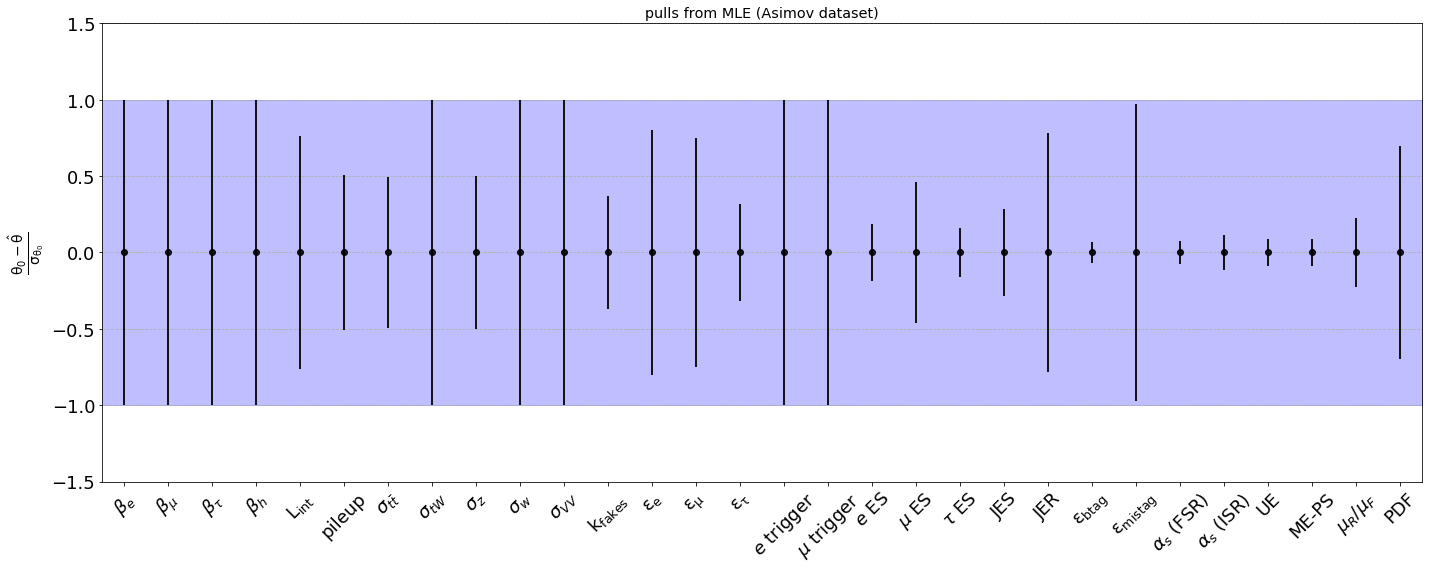

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%cd '/home/naodell/work/wbr/analysis'
np.set_printoptions(precision=3)
matplotlib.style.use('default')
params = {'legend.fontsize': 20,
          'axes.labelsize': 20,
          'figure.figsize': (8, 8),
          'axes.facecolor': 'white',
          'axes.titlesize':'x-large',
          'xtick.labelsize':18,
          'ytick.labelsize':18,
         }
matplotlib.rcParams.update(params)
%matplotlib inline

p_labels = [r'$\beta_{e}$', r'$\beta_{\mu}$', r'$\beta_{\tau}$', r'$\beta_{h}$',
            r'$\rm L_{int}$', 'pileup',
            r'$\sigma_{t\bar{t}}$', r'$\sigma_{tW}$', r'$\sigma_{z}$',  r'$\sigma_{w}$', r'$\sigma_{VV}$',
            r'$\rm k_{fakes}$', 
            r'$\rm \epsilon_{e}$', r'$\rm \epsilon_{\mu}$', r'$\rm \epsilon_{\tau}$',
            r'$e$ trigger', r'$\mu$ trigger',
            r'$e$ ES', r'$\mu$ ES', r'$\tau$ ES',
            'JES', 'JER', 
            r'$\rm \epsilon_{b tag}$',  r'$\rm \epsilon_{mistag}$',
            r'$\alpha_{s}$ (FSR)', r'$\alpha_{s}$ (ISR)',
            'UE', 'ME-PS', r'$\mu_{R}/\mu_{F}$', 'PDF',
           ]
p_nom = np.array(len(p_labels)*[0., ])
stderr_nom = np.array([
                       1., 1., 1., 1., # BR
                       0.025, 1., # lumi, pileup
                       0.05, 0.1, 0.1, 0.1, 0.1, # xsections 
                       0.25, # fakes
                       0.01, 0.01, 0.05,  # efficiencies
                       0.01, 0.01, # trigger
                       0.5, 0.2, 1., # lepton energy scale
                       1., 1., 1., 1., # jet energy scale and b tag
                       1., 1., 1., 1., 1., 1. # theory variations
                      ])

pulls = p_nom
stderr = np.array([
                   1., 1., 1., 1., # BR
                   0.019, 0.51, # lumi, pileup
                   0.0247, 0.1, 0.05, 0.10, 0.10, # xsections 
                   0.093, # fakes
                   0.008, 0.0075, 0.016,  # efficiencies
                   0.01, 0.01, # trigger
                   0.093, 0.092, 0.16, # lepton energy scale
                   0.283, 0.78, 0.069, 0.97, # jet energy scale and b tag
                   0.073, 0.114, 0.087, 0.088, 0.227, 0.698 # theory variations
                   ])

fig = plt.figure(figsize=(20, 8), facecolor='white')
ax = plt.subplot()

nparams = len(p_labels)
xticks = np.arange(1, nparams+1, 1)
rerr = stderr/stderr_nom
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, 4], [10.86, 10.86], c='C3', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )
#ax.fill_between([10.86-2*0.09, 10.86+2*0.09], [0, 0], [4, 4], color = 'b', alpha = 0.25 )

ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)

ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{0} - \hat{\theta}}{\sigma_{\theta_{0}}}$')
ax.set_title('pulls from MLE (Asimov dataset)')

plt.tight_layout()
plt.grid(linestyle='--', axis='y')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls.pdf')
plt.show()